In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

from mobilenet import create_model

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# load CIFAR100 dataset and pick the first 10 classes
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
index_train = np.where(Y_train.reshape(1,-1)[0] < 10)
Y_train = Y_train[index_train]
X_train = X_train[index_train]
index_test = np.where(Y_test.reshape(1,-1)[0] < 10)
Y_test = Y_test[index_test]
X_test = X_test[index_test]

In [4]:
# reshape each image to a size of (224, 224, 3)
X_train = X_train/255.0
X_test = X_test/255.0   
X_train= tf.image.resize(X_train,(224,224))
X_test= tf.image.resize(X_test,(224,224))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(5000, 224, 224, 3) (5000, 1) (1000, 224, 224, 3) (1000, 1)


In [13]:
# Experiment 1: Compare how width multiplier affect accuracy, size and computation of MobileNet
# create the baseline MobileNet with width multiplier = 1, imgsize = 224, and dropout_rate = 0.1
model = create_model(alpha=1, imgsize=224, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_6 (Depthwis (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_14 (ReLU)              (None, 112, 112, 32)     

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
313/313 [==============================] - 51s 121ms/step - loss: 2.2934 - accuracy: 0.1879 - val_loss: 4.5289 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 35s 113ms/step - loss: 1.9305 - accuracy: 0.3347 - val_loss: 3.2337 - val_accuracy: 0.1180
Epoch 3/40
313/313 [==============================] - 36s 114ms/step - loss: 1.7303 - accuracy: 0.4083 - val_loss: 2.0538 - val_accuracy: 0.3730
Epoch 4/40
313/313 [==============================] - 36s 114ms/step - loss: 1.5402 - accuracy: 0.4717 - val_loss: 1.8846 - val_accuracy: 0.4230
Epoch 5/40
313/313 [==============================] - 36s 114ms/step - loss: 1.3952 - accuracy: 0.5258 - val_loss: 2.1677 - val_accuracy: 0.3830
Epoch 6/40
313/313 [==============================] - 36s 114ms/step - loss: 1.3061 - accuracy: 0.5615 - val_loss: 2.2553 - val_accuracy: 0.3870
Epoch 7/40
313/313 [==============================] - 35s 113ms/step - loss: 1.1843 - accuracy: 0.5925 - val_loss: 1.7706 - val_ac

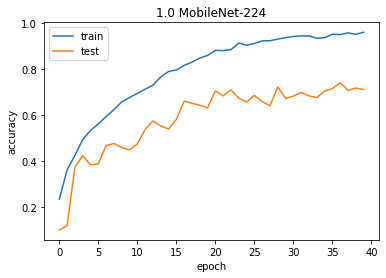

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1.0 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# create a reduced MobileNet with width multiplier = 0.75, imgsize = 224, and dropout_rate = 0.1
model = create_model(alpha=0.75, imgsize=224, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 112, 112, 24)      672       
_________________________________________________________________
batch_normalization_40 (Batc (None, 112, 112, 24)      96        
_________________________________________________________________
re_lu_40 (ReLU)              (None, 112, 112, 24)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 112, 112, 24)      0         
_________________________________________________________________
depthwise_conv2d_19 (Depthwi (None, 112, 112, 24)      240       
_________________________________________________________________
batch_normalization_41 (Batc (None, 112, 112, 24)      96        
_________________________________________________________________
re_lu_41 (ReLU)              (None, 112, 112, 24)     

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
313/313 [==============================] - 32s 92ms/step - loss: 2.2850 - accuracy: 0.1721 - val_loss: 3.9725 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 28s 90ms/step - loss: 2.0006 - accuracy: 0.2908 - val_loss: 3.3359 - val_accuracy: 0.1140
Epoch 3/40
313/313 [==============================] - 28s 90ms/step - loss: 1.7523 - accuracy: 0.4048 - val_loss: 2.4909 - val_accuracy: 0.2510
Epoch 4/40
313/313 [==============================] - 28s 90ms/step - loss: 1.6068 - accuracy: 0.4405 - val_loss: 3.2873 - val_accuracy: 0.2220
Epoch 5/40
313/313 [==============================] - 28s 90ms/step - loss: 1.4571 - accuracy: 0.4968 - val_loss: 1.9831 - val_accuracy: 0.3910
Epoch 6/40
313/313 [==============================] - 28s 89ms/step - loss: 1.4008 - accuracy: 0.5132 - val_loss: 1.8618 - val_accuracy: 0.3940
Epoch 7/40
313/313 [==============================] - 28s 90ms/step - loss: 1.2553 - accuracy: 0.5720 - val_loss: 1.9002 - val_accuracy:

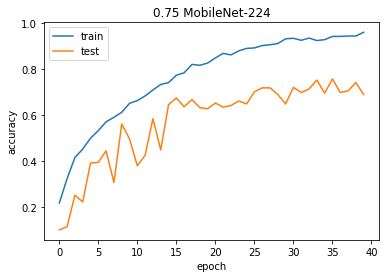

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.75 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# create a reduced MobileNet with width multiplier = 0.5, imgsize = 224, and dropout_rate = 0.1
model = create_model(alpha=0.5, imgsize=224, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 112, 112, 16)      448       
_________________________________________________________________
batch_normalization_94 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
re_lu_94 (ReLU)              (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
depthwise_conv2d_45 (Depthwi (None, 112, 112, 16)      160       
_________________________________________________________________
batch_normalization_95 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
re_lu_95 (ReLU)              (None, 112, 112, 16)     

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
313/313 [==============================] - 23s 66ms/step - loss: 2.2947 - accuracy: 0.1540 - val_loss: 3.6106 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 20s 65ms/step - loss: 2.0071 - accuracy: 0.2889 - val_loss: 4.5218 - val_accuracy: 0.1090
Epoch 3/40
313/313 [==============================] - 20s 64ms/step - loss: 1.8063 - accuracy: 0.3741 - val_loss: 2.9108 - val_accuracy: 0.2000
Epoch 4/40
313/313 [==============================] - 20s 63ms/step - loss: 1.6043 - accuracy: 0.4351 - val_loss: 2.8055 - val_accuracy: 0.1490
Epoch 5/40
313/313 [==============================] - 20s 64ms/step - loss: 1.5084 - accuracy: 0.4863 - val_loss: 2.5029 - val_accuracy: 0.2980
Epoch 6/40
313/313 [==============================] - 20s 64ms/step - loss: 1.3952 - accuracy: 0.5213 - val_loss: 2.2693 - val_accuracy: 0.3060
Epoch 7/40
313/313 [==============================] - 20s 64ms/step - loss: 1.2995 - accuracy: 0.5668 - val_loss: 2.1224 - val_accuracy:

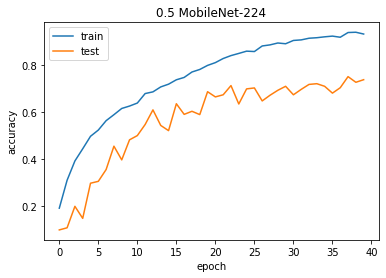

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.5 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# create a reduced MobileNet with width multiplier = 0.25, imgsize = 224, and dropout_rate = 0.1
model = create_model(alpha=0.25, imgsize=224, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 8)       224       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 8)       32        
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 8)       0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 8)       80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 8)       32        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 8)       0

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
313/313 [==============================] - 28s 51ms/step - loss: 2.2241 - accuracy: 0.1714 - val_loss: 2.8663 - val_accuracy: 0.1000
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 2.0787 - accuracy: 0.2452 - val_loss: 3.4019 - val_accuracy: 0.1050
Epoch 3/50
313/313 [==============================] - 14s 44ms/step - loss: 1.9574 - accuracy: 0.2904 - val_loss: 2.4590 - val_accuracy: 0.2230
Epoch 4/50
313/313 [==============================] - 14s 44ms/step - loss: 1.8726 - accuracy: 0.3443 - val_loss: 2.5620 - val_accuracy: 0.2570
Epoch 5/50
313/313 [==============================] - 14s 45ms/step - loss: 1.7764 - accuracy: 0.3821 - val_loss: 2.9591 - val_accuracy: 0.2530
Epoch 6/50
313/313 [==============================] - 14s 44ms/step - loss: 1.6762 - accuracy: 0.4213 - val_loss: 1.8041 - val_accuracy: 0.3900
Epoch 7/50
313/313 [==============================] - 14s 45ms/step - loss: 1.6247 - accuracy: 0.4280 - val_loss: 2.4111 - val_accuracy:

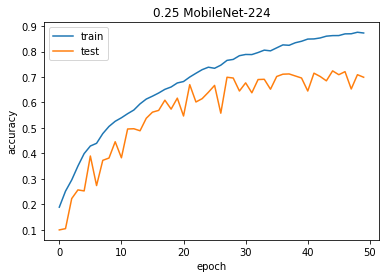

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.25 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
# Experiment 2: Compare how resolution multiplier affect accuracy, size and computation of MobileNet
# load CIFAR100 dataset and pick the first 10 classes
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
index_train = np.where(Y_train.reshape(1,-1)[0] < 10)
Y_train = Y_train[index_train]
X_train = X_train[index_train]
index_test = np.where(Y_test.reshape(1,-1)[0] < 10)
Y_test = Y_test[index_test]
X_test = X_test[index_test]

In [6]:
# reshape each image to a size of (192, 192, 3)
X_train = X_train/255.0
X_test = X_test/255.0   
X_train_192= tf.image.resize(X_train,(192,192))
X_test_192= tf.image.resize(X_test,(192,192))
print(X_train_192.shape, Y_train.shape, X_test_192.shape, Y_test.shape)

(5000, 192, 192, 3) (5000, 1) (1000, 192, 192, 3) (1000, 1)


In [7]:
# create a MobileNet with width multiplier = 1, imgsize = 192, and dropout_rate = 0.1
model = create_model(alpha=1, imgsize=192, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 96, 96, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 32)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 96, 96, 32)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train_192, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test_192, Y_test))

Epoch 1/40
313/313 [==============================] - 40s 89ms/step - loss: 2.3304 - accuracy: 0.1723 - val_loss: 4.2234 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 26s 84ms/step - loss: 2.0148 - accuracy: 0.2827 - val_loss: 4.7909 - val_accuracy: 0.1000
Epoch 3/40
313/313 [==============================] - 26s 84ms/step - loss: 1.8036 - accuracy: 0.3872 - val_loss: 2.2838 - val_accuracy: 0.2990
Epoch 4/40
313/313 [==============================] - 26s 83ms/step - loss: 1.6578 - accuracy: 0.4217 - val_loss: 3.1280 - val_accuracy: 0.2220
Epoch 5/40
313/313 [==============================] - 26s 83ms/step - loss: 1.4905 - accuracy: 0.4893 - val_loss: 2.3127 - val_accuracy: 0.3220
Epoch 6/40
313/313 [==============================] - 26s 83ms/step - loss: 1.3793 - accuracy: 0.5273 - val_loss: 2.9115 - val_accuracy: 0.2740
Epoch 7/40
313/313 [==============================] - 26s 83ms/step - loss: 1.2794 - accuracy: 0.5528 - val_loss: 1.7136 - val_accuracy:

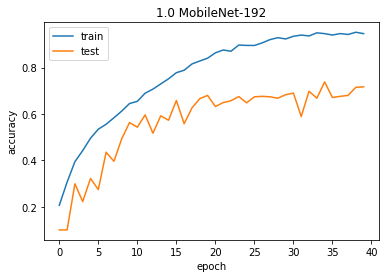

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1.0 MobileNet-192')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# reshape each image to a size of (160, 160, 3)
X_train_160= tf.image.resize(X_train,(160,160))
X_test_160= tf.image.resize(X_test,(160,160))
print(X_train_160.shape, Y_train.shape, X_test_160.shape, Y_test.shape)

(5000, 160, 160, 3) (5000, 1) (1000, 160, 160, 3) (1000, 1)


In [6]:
# create a MobileNet with width multiplier = 1, imgsize = 160, and dropout_rate = 0.1
model = create_model(alpha=1, imgsize=160, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 80, 80, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 80, 80, 32)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 80, 80, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 80, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 80, 80, 32)        0

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train_160, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test_160, Y_test))

Epoch 1/40
313/313 [==============================] - 33s 65ms/step - loss: 2.3579 - accuracy: 0.1582 - val_loss: 2.9086 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 19s 61ms/step - loss: 1.9904 - accuracy: 0.2967 - val_loss: 2.9059 - val_accuracy: 0.1270
Epoch 3/40
313/313 [==============================] - 19s 62ms/step - loss: 1.7286 - accuracy: 0.4055 - val_loss: 2.2955 - val_accuracy: 0.3500
Epoch 4/40
313/313 [==============================] - 20s 63ms/step - loss: 1.5799 - accuracy: 0.4699 - val_loss: 2.4414 - val_accuracy: 0.3050
Epoch 5/40
313/313 [==============================] - 19s 62ms/step - loss: 1.4962 - accuracy: 0.4913 - val_loss: 1.9606 - val_accuracy: 0.3430
Epoch 6/40
313/313 [==============================] - 19s 62ms/step - loss: 1.3663 - accuracy: 0.5335 - val_loss: 2.0738 - val_accuracy: 0.3540
Epoch 7/40
313/313 [==============================] - 19s 62ms/step - loss: 1.2927 - accuracy: 0.5600 - val_loss: 1.9659 - val_accuracy:

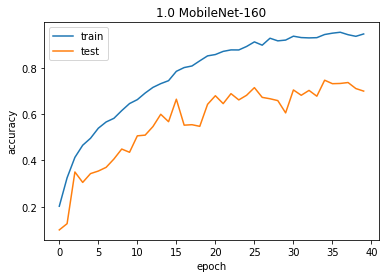

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1.0 MobileNet-160')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# reshape each image to a size of (128, 128, 3)
X_train_128= tf.image.resize(X_train,(128,128))
X_test_128= tf.image.resize(X_test,(128,128))
print(X_train_128.shape, Y_train.shape, X_test_128.shape, Y_test.shape)

(5000, 128, 128, 3) (5000, 1) (1000, 128, 128, 3) (1000, 1)


In [10]:
# create a MobileNet with width multiplier = 1, imgsize = 128, and dropout_rate = 0.1
model = create_model(alpha=1, imgsize=128, num_classes=10, dropout_rate=0.1)
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_27 (ReLU)              (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
depthwise_conv2d_13 (Depthwi (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_28 (ReLU)              (None, 64, 64, 32)       

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train_128, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test_128, Y_test))

Epoch 1/40
313/313 [==============================] - 16s 40ms/step - loss: 2.3503 - accuracy: 0.1638 - val_loss: 2.8475 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 12s 38ms/step - loss: 2.0004 - accuracy: 0.2969 - val_loss: 3.1819 - val_accuracy: 0.1310
Epoch 3/40
313/313 [==============================] - 12s 38ms/step - loss: 1.7361 - accuracy: 0.3948 - val_loss: 2.4910 - val_accuracy: 0.2400
Epoch 4/40
313/313 [==============================] - 12s 38ms/step - loss: 1.6725 - accuracy: 0.4310 - val_loss: 3.8519 - val_accuracy: 0.2610
Epoch 5/40
313/313 [==============================] - 12s 38ms/step - loss: 1.5024 - accuracy: 0.4881 - val_loss: 1.5516 - val_accuracy: 0.4970
Epoch 6/40
313/313 [==============================] - 12s 38ms/step - loss: 1.4096 - accuracy: 0.5291 - val_loss: 1.8779 - val_accuracy: 0.4180
Epoch 7/40
313/313 [==============================] - 12s 38ms/step - loss: 1.3496 - accuracy: 0.5360 - val_loss: 1.9849 - val_accuracy:

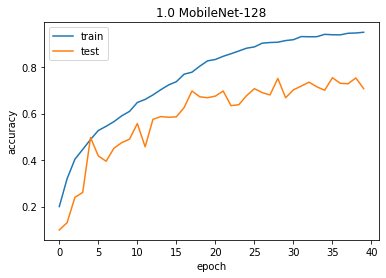

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1.0 MobileNet-128')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# Experiment 3: Compare thinner MobileNet with alpha = 0.75 to shallower MobileNet with less layers.
# Reshape each image to a size of (224, 224, 3)
X_train = X_train/255.0
X_test = X_test/255.0   
X_train= tf.image.resize(X_train,(224,224))
X_test= tf.image.resize(X_test,(224,224))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(5000, 224, 224, 3) (5000, 1) (1000, 224, 224, 3) (1000, 1)


In [9]:
# Create a shallower MobilNet
model = create_model(alpha=1, imgsize=224, num_classes=10, dropout_rate=0.1, shallow=True)
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_17 (ReLU)              (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_8 (Depthwis (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_18 (ReLU)              (None, 112, 112, 32)     

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
313/313 [==============================] - 33s 100ms/step - loss: 2.1590 - accuracy: 0.2291 - val_loss: 6.0357 - val_accuracy: 0.1000
Epoch 2/40
313/313 [==============================] - 30s 95ms/step - loss: 1.7272 - accuracy: 0.4087 - val_loss: 3.3220 - val_accuracy: 0.2380
Epoch 3/40
313/313 [==============================] - 30s 95ms/step - loss: 1.4222 - accuracy: 0.5239 - val_loss: 1.9426 - val_accuracy: 0.3880
Epoch 4/40
313/313 [==============================] - 29s 94ms/step - loss: 1.2751 - accuracy: 0.5617 - val_loss: 2.4390 - val_accuracy: 0.3570
Epoch 5/40
313/313 [==============================] - 29s 94ms/step - loss: 1.0859 - accuracy: 0.6325 - val_loss: 1.5834 - val_accuracy: 0.4790
Epoch 6/40
313/313 [==============================] - 29s 94ms/step - loss: 0.9924 - accuracy: 0.6709 - val_loss: 2.4494 - val_accuracy: 0.3950
Epoch 7/40
313/313 [==============================] - 29s 94ms/step - loss: 0.8664 - accuracy: 0.6974 - val_loss: 1.2730 - val_accuracy

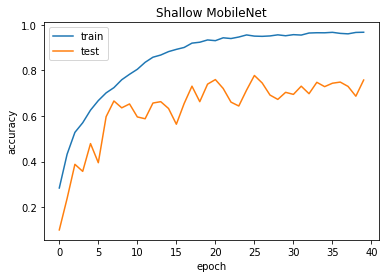

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Shallow MobileNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
# Experiment 4: Compare MobileNet with VGG16 and InceptionV3
# reference: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/
# build keras VGG16 with pre-trained weights
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3), include_top=False)
# set the layers in base model as untrainable
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
# add a Flatten layer, two Dense layers, a Dropout layer and an output layer
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
313/313 [==============================] - 43s 98ms/step - loss: 3.9879 - accuracy: 0.3291 - val_loss: 1.1467 - val_accuracy: 0.5990
Epoch 2/20
313/313 [==============================] - 29s 93ms/step - loss: 0.9873 - accuracy: 0.6452 - val_loss: 0.9213 - val_accuracy: 0.6860
Epoch 3/20
313/313 [==============================] - 30s 95ms/step - loss: 0.7382 - accuracy: 0.7393 - val_loss: 0.9454 - val_accuracy: 0.6800
Epoch 4/20
313/313 [==============================] - 30s 95ms/step - loss: 0.6034 - accuracy: 0.7937 - val_loss: 0.9237 - val_accuracy: 0.6970
Epoch 5/20
313/313 [==============================] - 30s 94ms/step - loss: 0.4595 - accuracy: 0.8332 - val_loss: 0.8240 - val_accuracy: 0.7310
Epoch 6/20
313/313 [==============================] - 30s 95ms/step - loss: 0.3586 - accuracy: 0.8743 - val_loss: 0.8322 - val_accuracy: 0.7500
Epoch 7/20
313/313 [==============================] - 30s 95ms/step - loss: 0.2684 - accuracy: 0.9053 - val_loss: 0.8734 - val_accuracy:

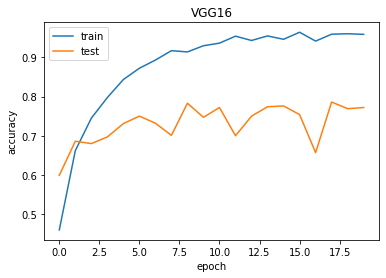

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# build keras InceptionV3 with pre-trained weights
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3), include_top=False)
# set the layers in base model as untrainable
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
# add a Global Average Pooling layer, a Dense layer, a Dropout layer and an output layer
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 111, 111, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_128 (BatchN (None, 111, 111, 32) 96          conv2d_114[0][0]                 
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 111, 111, 32) 0           batch_normalization_128[0][0]    
____________________________________________________________________________________________

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
313/313 [==============================] - 19s 51ms/step - loss: 1.0696 - accuracy: 0.7067 - val_loss: 0.5434 - val_accuracy: 0.8090
Epoch 2/20
313/313 [==============================] - 15s 48ms/step - loss: 0.3738 - accuracy: 0.8713 - val_loss: 0.4023 - val_accuracy: 0.8670
Epoch 3/20
313/313 [==============================] - 15s 48ms/step - loss: 0.2848 - accuracy: 0.8945 - val_loss: 0.4392 - val_accuracy: 0.8760
Epoch 4/20
313/313 [==============================] - 15s 48ms/step - loss: 0.2467 - accuracy: 0.9086 - val_loss: 0.5084 - val_accuracy: 0.8510
Epoch 5/20
313/313 [==============================] - 15s 47ms/step - loss: 0.1966 - accuracy: 0.9263 - val_loss: 0.4072 - val_accuracy: 0.8730
Epoch 6/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1457 - accuracy: 0.9463 - val_loss: 0.5023 - val_accuracy: 0.8610
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1155 - accuracy: 0.9560 - val_loss: 0.5267 - val_accuracy:

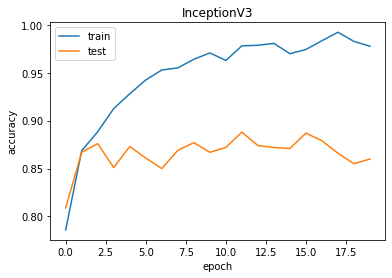

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()